# Importing the Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Visualisation

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#converting them into numoy arrays
train_np = np.array(train, dtype = 'float32')
test_np = np.array(test, dtype = 'float32')

In [6]:
train_np.shape

(42000, 785)

In [7]:
test_np.shape

(28000, 784)

5.0

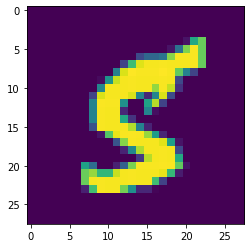

In [8]:
#looking at random numbers
i = random.randint(1,42000)
i
plt.imshow(train_np[i,1:].reshape(28,28))
label = train_np[i,0]
label



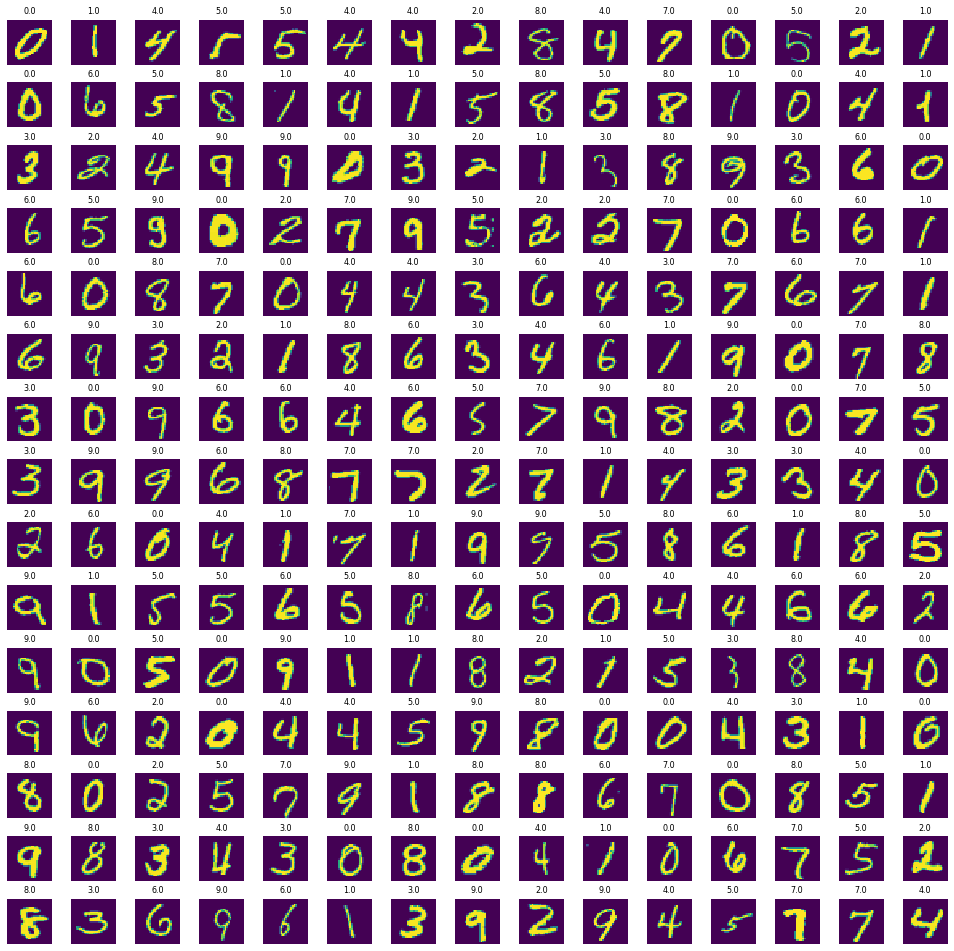

In [9]:
#Visualizing in grid format
width = 15
length = 15
fig, axes = plt.subplots(length, width, figsize = (17,17))
axes = axes.ravel()
n_train = len(train_np)
for i in np.arange(0 , width*length):
    index = np.random.randint(0 , n_train)
    axes[i].imshow(train_np[index,1:].reshape(28,28))
    axes[i].set_title(train_np[index,0], fontsize = 8)
    axes[i].axis("off")
plt.subplots_adjust(hspace = 0.4)
    


# Deep Learning Model

In [10]:
X_train = train_np[:,1:]/255
y_train = train_np[:,0]

X_test = test_np/255

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_validate,y_train,y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [12]:
X_train.shape

(33600, 784)

In [13]:
y_train.shape

(33600,)

In [14]:
X_validate.shape

(8400, 784)

In [15]:
y_validate.shape

(8400,)

In [16]:
X_test.shape

(28000, 784)

In [17]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [18]:
X_test.shape

(28000, 28, 28, 1)

In [19]:
X_train.shape

(33600, 28, 28, 1)

In [20]:
X_validate.shape

(8400, 28, 28, 1)

In [21]:
import keras


Using TensorFlow backend.


In [22]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
#Just to find the number of categories we need
Max_item = max(y_train)
Max_item


9.0

In [24]:
Min_item = min(y_train)
Min_item

0.0

In [25]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64,3,3, input_shape = (28,28,1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32,activation = 'relu'))
cnn_model.add(Dense(output_dim = 10,activation = 'sigmoid'))

C:\Users\jayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
C:\Users\jayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  import sys
C:\Users\jayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [26]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

In [27]:
epochs = 50
model = cnn_model.fit(X_train,
                      y_train,
                      batch_size = 512,
                      nb_epoch = epochs,
                      verbose = 1,
                      validation_data = (X_validate,y_validate)
                      )

C:\Users\jayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 26s 762us/step - loss: 1.0192 - accuracy: 0.6895 - val_loss: 0.3199 - val_accuracy: 0.9075
Epoch 2/50
33600/33600 [==============================] - 26s 777us/step - loss: 0.2813 - accuracy: 0.9152 - val_loss: 0.2492 - val_accuracy: 0.9286
Epoch 3/50
33600/33600 [==============================] - 23s 690us/step - loss: 0.2177 - accuracy: 0.9353 - val_loss: 0.1878 - val_accuracy: 0.9485
Epoch 4/50
33600/33600 [==============================] - 24s 718us/step - loss: 0.1658 - accuracy: 0.9519 - val_loss: 0.1530 - val_accuracy: 0.9598
Epoch 5/50
33600/33600 [==============================] - 25s 736us/step - loss: 0.1376 - accuracy: 0.9599 - val_loss: 0.1293 - val_accuracy: 0.9670
Epoch 6/50
33600/33600 [==============================] - 24s 701us/step - loss: 0.1130 - accuracy: 0.9671 - val_loss: 0.1128 - val_accuracy: 0.9710
Epoch 7/50
27648/33600 [=======================>......] -

KeyboardInterrupt: 

# Making predictions

In [ ]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

In [ ]:
width = 5
length = 5
fig, axes = plt.subplots(length, width, figsize = (17,17))
axes = axes.ravel()
n_test = len(test_np)
for i in np.arange(0 , width*length):
    index = np.random.randint(0 , n_test)
    axes[i].imshow(test_np[index,:].reshape(28,28))
    axes[i].set_title("Predicted class ={:0.1f} ".format(predicted_classes[index]), fontsize = 8)
    axes[i].axis("off")
plt.subplots_adjust(hspace = 0.4)

# The prediction on a downloaded image

In [3]:
from PIL import Image
import os

In [8]:
base_dir = os.path.dirname(os.path.abspath())

TypeError: abspath() missing 1 required positional argument: 'path'

In [11]:
im = Image.open("7.jpg").convert("L")

In [16]:
imagearray = np.array(im,"uint8")/255

TypeError: 'tuple' object is not callable